In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

In [2]:
dataset = load_dataset("lukebarousse/data_jobs")
df = pd.DataFrame(dataset['train'])

In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [6]:
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

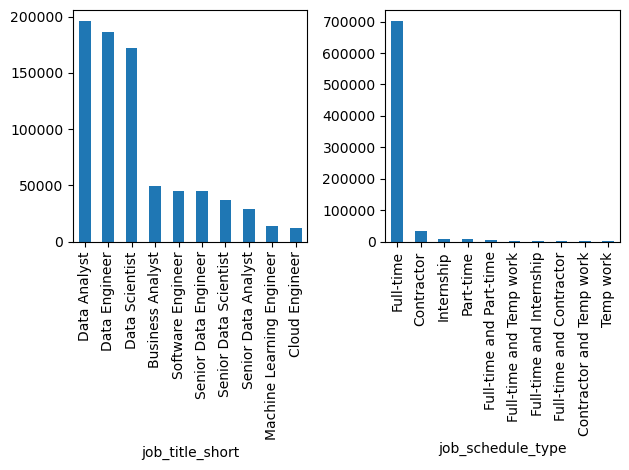

In [13]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(10).plot(kind='bar', ax=ax[1])

fig.tight_layout()

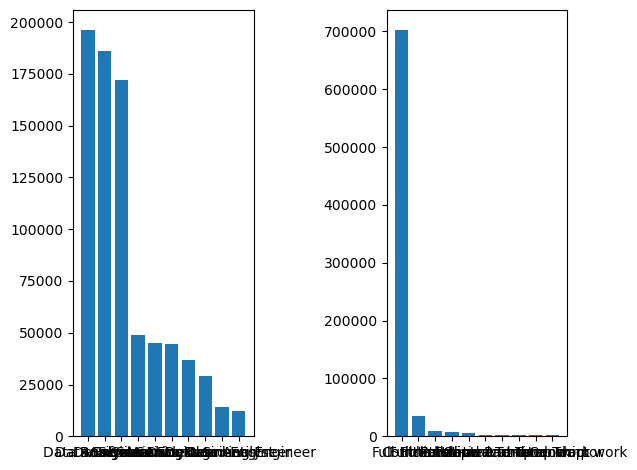

In [18]:
fig, ax = plt.subplots(1,2)
ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(10).index, df['job_schedule_type'].value_counts().head(10))
fig.tight_layout()

In [28]:
df_skills = df.explode('job_skills')

In [29]:
skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()

In [32]:
df_skills_count = skills_count.reset_index(name='count')

In [33]:
df_skills_count.head()

,job_title_short,job_skills,count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120


In [35]:
df_skills_count.sort_values(by='count', ascending=False, inplace=True)
df_skills_count.head(5)

,job_title_short,job_skills,count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982


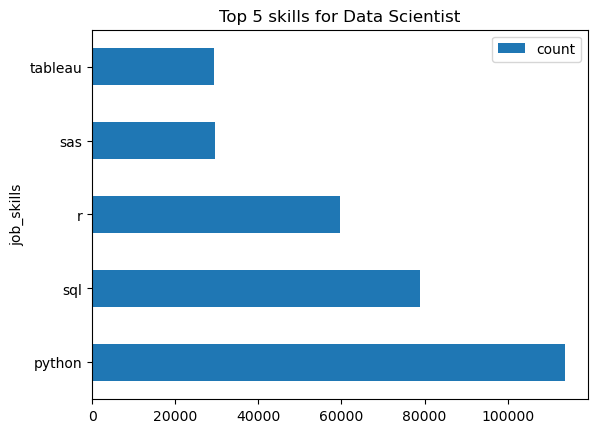

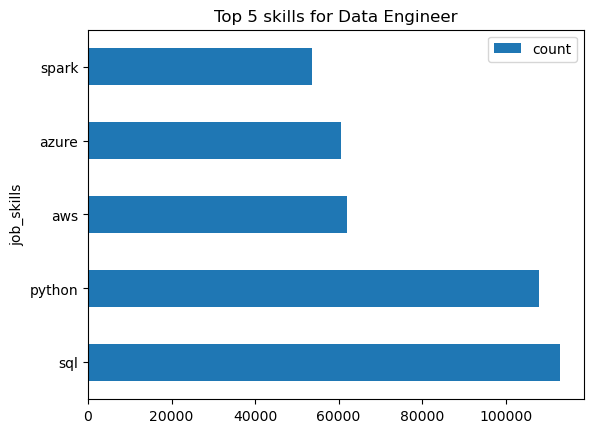

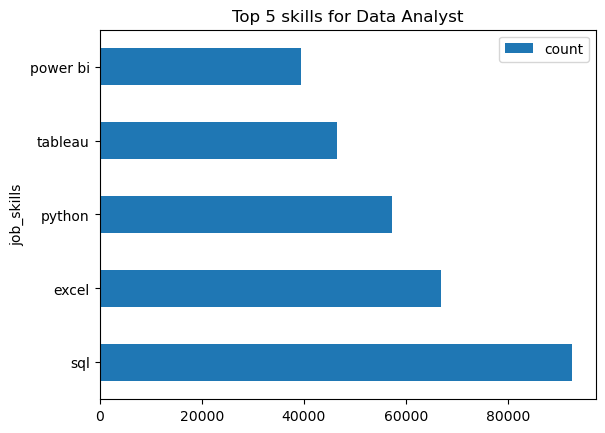

In [45]:
top = 5

for x in df_skills_count['job_title_short'].unique()[:3].tolist():
    (df_skills_count[df_skills_count['job_title_short'] == x].head(top).plot(kind='barh', x='job_skills', y='count', title=f'Top {top} skills for {x}'))
    

In [51]:
job_titles = df_skills_count['job_title_short'].unique()[:3].tolist()
job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

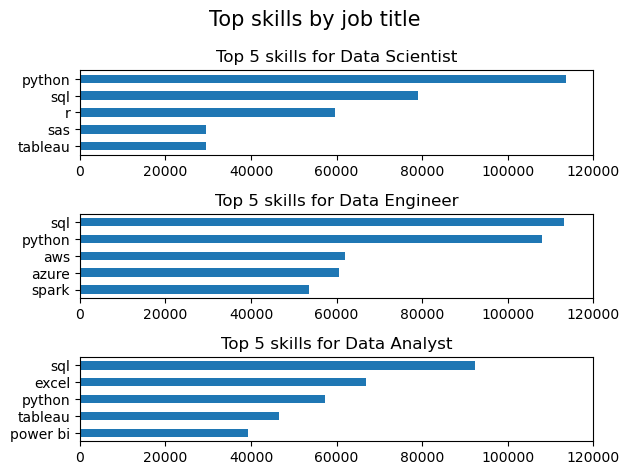

In [66]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_skills_count[df_skills_count['job_title_short'] == job_title].head(top).plot(kind = 'barh', x = 'job_skills', y = 'count', ax = ax[i], title = f'Top {top} skills for {job_title}')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 120000)
    
     
fig.suptitle('Top skills by job title', fontsize=15)
fig.tight_layout()